# Files & imports

In [102]:
from pandas import read_csv, DataFrame
import pandas as pd
from functools import reduce
import os
print(os.getcwd())

/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/notebooks/dataset_2_store_sales


In [103]:
%run 'scripts/dslabs_functions.py'


In [104]:
## https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

holidays = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/notebooks/dataset_2_store_sales/dataset/holidays_events.csv") 
oil = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/notebooks/dataset_2_store_sales/dataset/oil.csv")
stores = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/notebooks/dataset_2_store_sales/dataset/stores.csv")
transactions = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/notebooks/dataset_2_store_sales/dataset/train.csv")
#test_df = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/dataset_2_store_sales/dataset/test.csv")

train_df = pd.read_csv("/Users/cozmaeug/Private/IST PG - DS/DaSH ENG/ist_dash_2024_rec/time_series_forecasting/notebooks/dataset_2_store_sales/dataset/train.csv")

file_tag = "Ecuadorian Store Sales"


In [105]:
holidays.info()
holidays['date'] = pd.to_datetime(holidays['date'])
holidays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [106]:
oil.info()
oil['date'] = pd.to_datetime(oil['date'])
oil.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [107]:
stores.info()
stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [108]:
transactions.info()
transactions['date'] = pd.to_datetime(transactions['date'])
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [109]:
train_df.info()
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [110]:
train_df = train_df.drop(columns=["family", "store_nbr"])
train_df.head()

,id,date,sales,onpromotion
0,0,2013-01-01,0.0,0
1,1,2013-01-01,0.0,0
2,2,2013-01-01,0.0,0
3,3,2013-01-01,0.0,0
4,4,2013-01-01,0.0,0


## sampling by time period

In [111]:
# Sample 10% of rows from each month
train_df["year_month"] = train_df["date"].dt.to_period("M")  # Extract year-month
train_df = train_df.groupby("year_month").sample(frac=0.03, random_state=42)  # 10% per month


In [112]:
print(train_df["date"].dtype)  # Check if date is in datetime format
print(train_df["year_month"].nunique())  # Check how many unique months exist

datetime64[ns]
56


In [113]:
train_df = train_df.drop(columns=["year_month", "id"])

# Dimensionality

In [114]:
from matplotlib.pyplot import figure, savefig, show
from pandas import read_csv, DataFrame
import pandas as pd


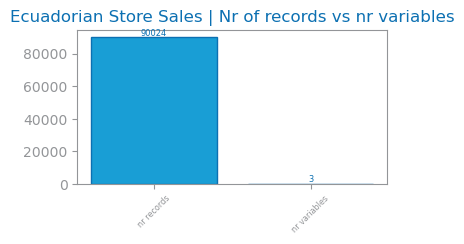

In [115]:
figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": train_df.shape[0], "nr variables": train_df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
savefig(f"{file_tag}_records_variables.png") #save for later step
show()

## Missing values


Variables with their respective percentages of missing values:


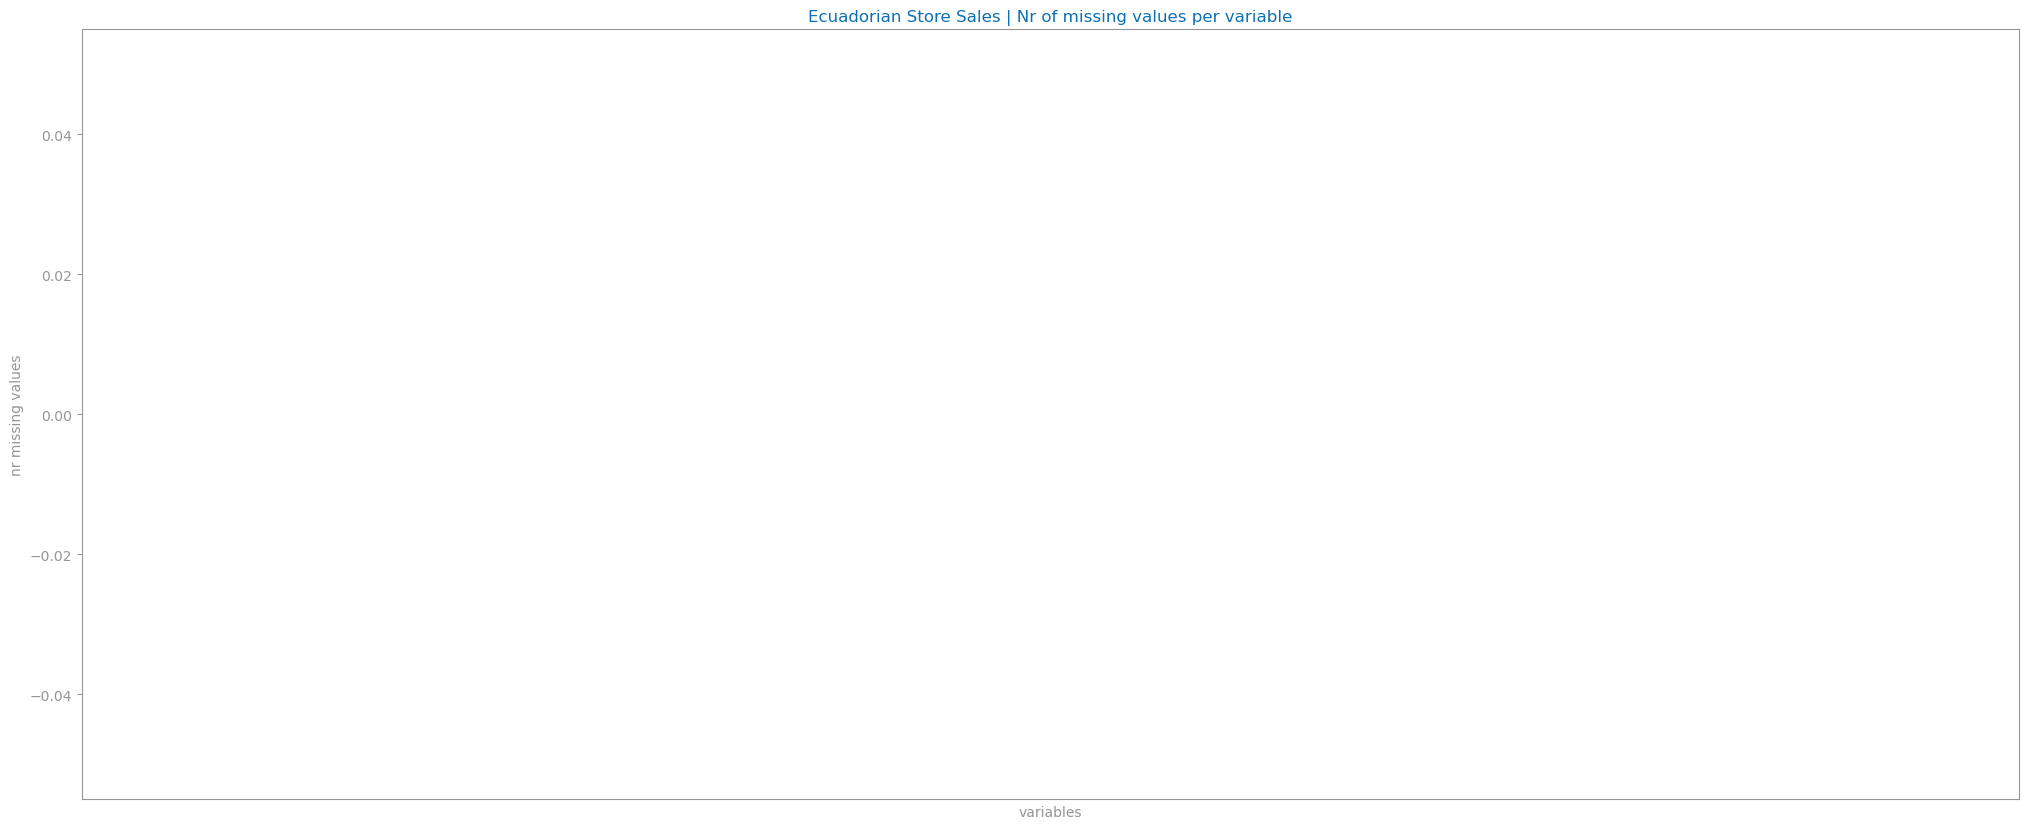

In [116]:
mv: dict[str, int] = {}
total_rows = len(train_df)

# Calculate the number of missing values and percentage for each variable
for var in train_df.columns:
    nr: int = train_df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

# Sort the dictionary by the number of missing values in descending order
sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

# Print the list of variables with their respective percentages of missing values
print("Variables with their respective percentages of missing values:")
for var, perc in zip(variables, percentages):
    print(f"{var}: {perc:.2f}%")

# Plotting the bar chart
figure(figsize=(25, 10))  # (width, height)

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} | Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)

# Annotate the bars with percentages
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

# Display the chart
show()

## Variables types

In [117]:
print(train_df.dtypes)

date           datetime64[ns]
sales                 float64
onpromotion             int64
dtype: object


In [118]:
for col in train_df.columns:
    print(f"{col}: {train_df[col].map(type).unique()}")

date: [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
sales: [<class 'float'>]
onpromotion: [<class 'int'>]


In [119]:
def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    # Check if the index is a datetime type
    if isinstance(df.index, pd.DatetimeIndex):
        variable_types["date"].append("index")  # Label index separately

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c] = df[c].astype("bool")  # Convert to boolean
        else:
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types


{'numeric': ['sales', 'onpromotion'], 'binary': [], 'date': ['date'], 'symbolic': []}


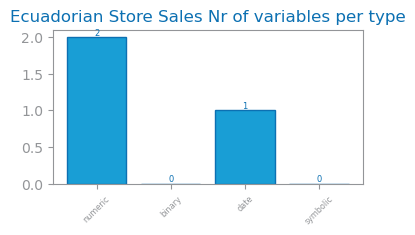

In [120]:
variable_types: dict[str, list] = get_variable_types(train_df)
print(variable_types)
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} Nr of variables per type"
)
savefig(f"./{file_tag}_variable_types.png") 
show()

In [121]:
variables_types: dict[str, list] = get_variable_types(train_df)
print("Date columns:", variables_types["date"])

Date columns: ['date']


## Plots

In [122]:
import matplotlib.pyplot as plt
# For time series analysis, it's often useful to set the date column as the DataFrame index
train_df.set_index('date', inplace=True)

In [123]:
variables_types: dict[str, list] = get_variable_types(train_df)
print("Date columns:", variables_types["date"])

Date columns: ['index']


In [124]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots
from matplotlib.figure import Figure


def plot_ts_multivariate_chart(data: DataFrame, title: str) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(data.shape[1], 1, figsize=(3 * HEIGHT, HEIGHT / 2 * data.shape[1]))
    fig.suptitle(title)

    for i in range(data.shape[1]):
        col: str = data.columns[i]
        if not pd.api.types.is_numeric_dtype(data[col]):
            print(f"Skipping column '{col}' (not numeric)")  
            continue  # Skip non-numeric columns
        plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs[i],
            xlabel=data.index.name,
            ylabel=col,
        )
    return axs

Nr. Records =  (90024, 2)
First timestamp 2013-01-06 00:00:00
Last timestamp 2017-08-13 00:00:00


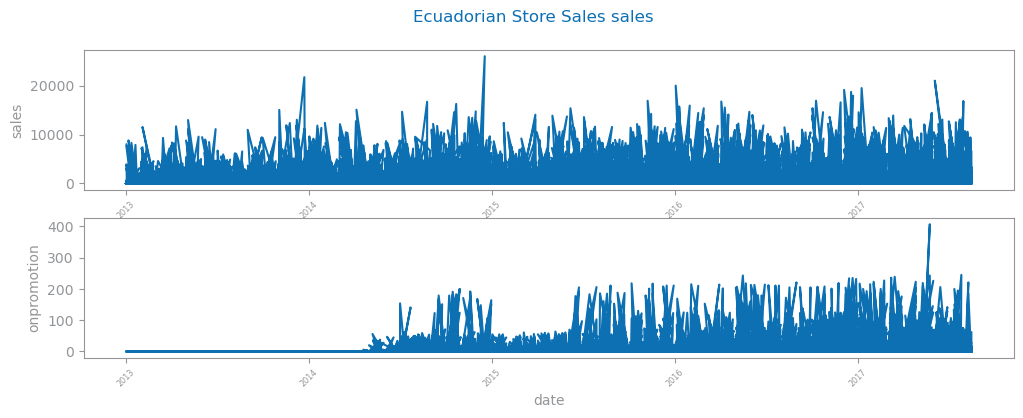

In [125]:
target = "sales"
data: DataFrame = train_df 

print("Nr. Records = ", data.shape)
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])

plot_ts_multivariate_chart(data, title=f"{file_tag} {target}")
show()

# Granularity

## Dates

In [126]:
def derive_date_variables(df: DataFrame, date_columns: list[str]) -> DataFrame:
    for date_col in date_columns:
        if date_col == 'index' and isinstance(df.index, pd.DatetimeIndex):
            df['date'] = df.index  # Copy index into a 'date' column
        
        # Ensure we have the 'date' column now
        if 'date' in df.columns:
            df['year'] = df['date'].dt.year
            df['month'] = df['date'].dt.month
            df['quarter'] = df['date'].dt.quarter
            df['day'] = df['date'].dt.day
        else:
            raise ValueError("No valid date column found!")
    
    return df


Index(['sales', 'onpromotion', 'date', 'year', 'month', 'quarter', 'day'], dtype='object')


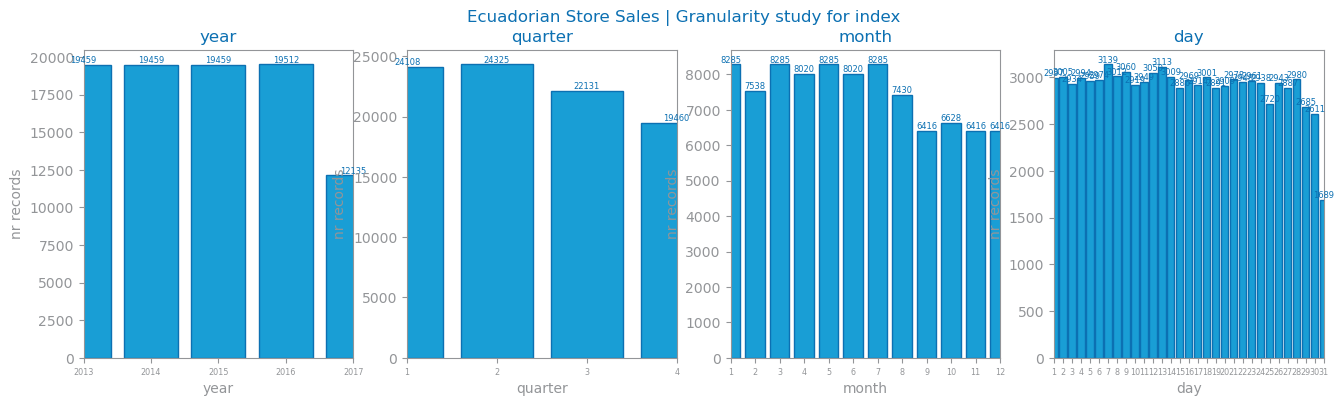

<Figure size 640x480 with 0 Axes>

In [127]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
#from dslabs_functions import plot_bar_chart, HEIGHT
#get_variable_types

def analyse_date_granularity(train_df: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} | Granularity study for {var}")

    for i in range(cols):
        # Directly use 'year', 'month', 'quarter', 'day' instead of 'index_year', 'index_quarter', etc.
        column_name = levels[i]  # Just use the level directly like 'year', 'quarter', 'month', 'day'
        
        if column_name not in train_df.columns:
            print(f"Warning: {column_name} column not found.")
            continue
        
        counts: Series[int] = train_df[column_name].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    plt.show()
    return axs


train_df: DataFrame = train_df
variables_types: dict[str, list] = get_variable_types(train_df)

# Now call derive_date_variables after getting the date columns
train_df_ext: DataFrame = derive_date_variables(train_df, variables_types["date"])

# Check the columns to ensure everything is correct
print(train_df_ext.columns)  # Check if 'year', 'quarter', 'month', 'day' exist

for v_date in variables_types["date"]:
    analyse_date_granularity(train_df_ext, v_date, ["year", "quarter", "month", "day"])
    savefig(f"./{file_tag}_granularity_{v_date}.png")
    show()



# Time series analysis

In [128]:
data: DataFrame = train_df
series: Series = data[target]

In [129]:
#train_df.set_index("date", inplace=True)
train_df.index = pd.to_datetime(train_df.index)

In [130]:
variables_types: dict[str, list] = get_variable_types(train_df)
#print("Date columns:", variables_types["date"])

In [131]:
def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: str = "D",
    agg_func: str = "mean",
) -> Series | DataFrame:
    df: Series | DataFrame = train_df.copy()  # Keeping original approach
    index: Index[Period] = df.index.to_period(gran_level)
    
    # Ensure we only aggregate numeric columns (ignoring datetime columns)
    numeric_cols = df.select_dtypes(include=["number"])
    df = numeric_cols.groupby(by=index, dropna=True, sort=True).agg(agg_func)
    
    df.index = df.index.to_timestamp()  # Convert back to datetime

    return df


Aggregated data for granularity D:
                 sales  onpromotion    year  month  quarter  day
date                                                            
2013-01-01    0.446429          0.0  2013.0    1.0      1.0  1.0
2013-01-02  594.242940          0.0  2013.0    1.0      1.0  2.0
2013-01-03  173.727536          0.0  2013.0    1.0      1.0  3.0
2013-01-04   30.817077          0.0  2013.0    1.0      1.0  4.0
2013-01-05  242.770020          0.0  2013.0    1.0      1.0  5.0
Aggregated data for granularity W:
                 sales  onpromotion    year     month  quarter        day
date                                                                     
2012-12-31  240.254453          0.0  2013.0  1.000000      1.0   3.511401
2013-01-07  245.490748          0.0  2013.0  1.000000      1.0  10.134048
2013-01-14  185.697240          0.0  2013.0  1.000000      1.0  17.197500
2013-01-21  134.964719          0.0  2013.0  1.000000      1.0  24.035135
2013-01-28  261.599305         

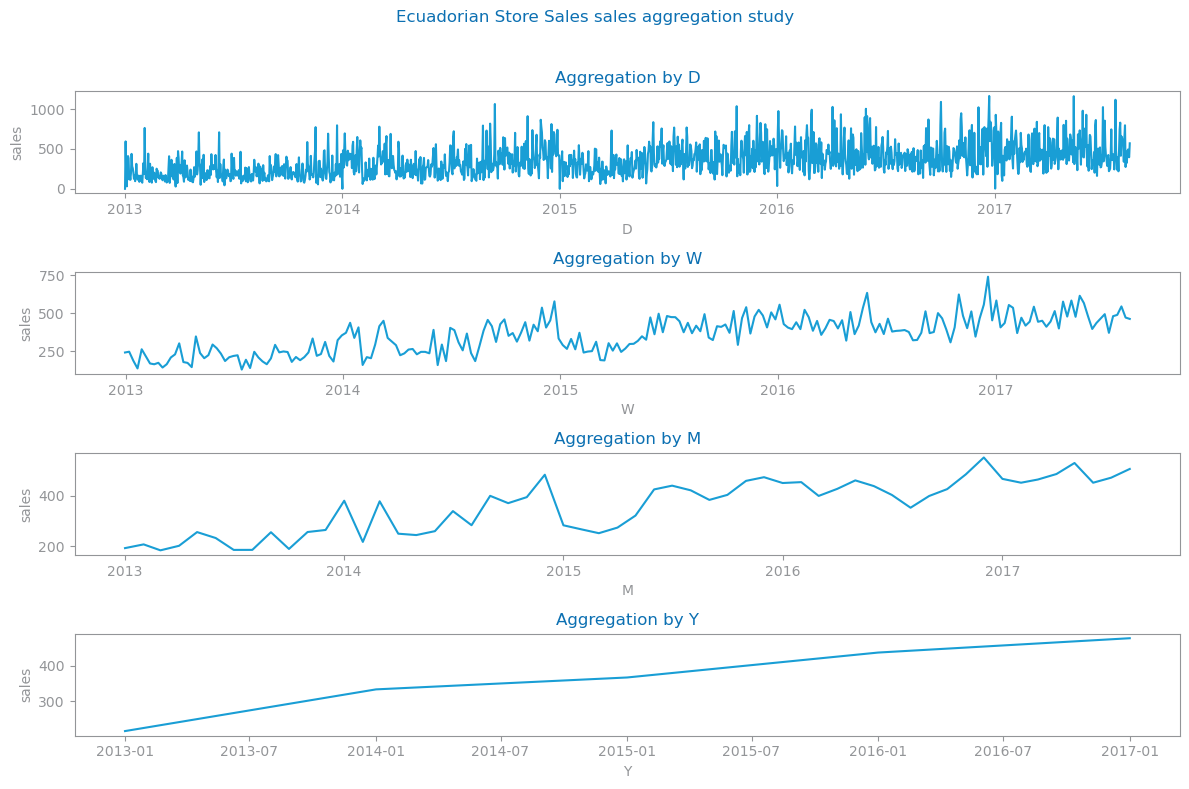

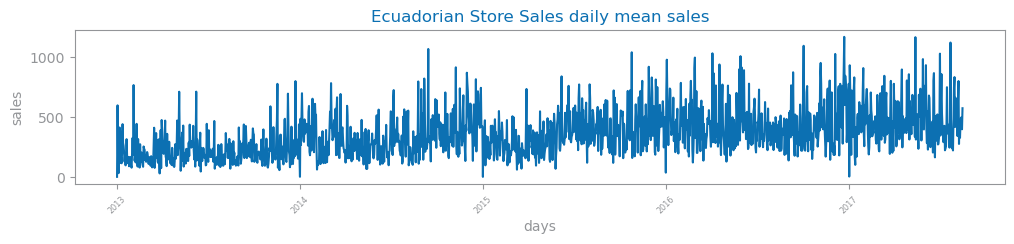

In [132]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure

grans: list[str] = ["D", "W", "M", "Y"]
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(grans), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)))
fig.suptitle(f"{file_tag} {target} aggregation study")

# Loop through granularities and apply aggregation
for i, gran in enumerate(grans):
    # Perform aggregation for each granularity
    ss_gran: DataFrame = ts_aggregation_by(series, gran)
    
    # Check if ss_gran is empty and print
    print(f"Aggregated data for granularity {gran}:")
    print(ss_gran.head())  # Show a preview of the data to check if it worked
    
    # If data is valid, plot it
    if not ss_gran.empty:
        axs[i].plot(ss_gran.index.to_list(), ss_gran[target].tolist())
        axs[i].set_title(f"Aggregation by {gran}")
        axs[i].set_xlabel(gran)
        axs[i].set_ylabel(target)
    else:
        axs[i].set_title(f"Aggregation by {gran} (No Data)")
        axs[i].text(0.5, 0.5, "No data to plot", ha="center", va="center", fontsize=12)

fig.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to give space for the suptitle
show()
#-----------

ss_days: DataFrame = ts_aggregation_by(series, "D")
# Ensure you're selecting the specific column (target) from the DataFrame
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days[target].tolist(),  # Access the target column and call .tolist()
    xlabel="days",
    ylabel=target,
    title=f"{file_tag} daily mean {target}",
)
show()


# Distribution

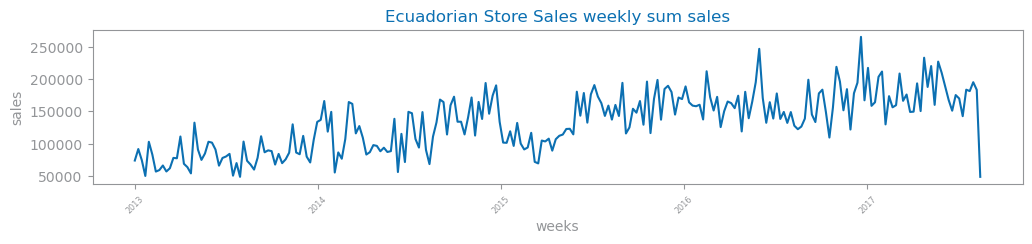

In [133]:
data: DataFrame = train_df
series: Series = data[target]

ss_weeks_sum: DataFrame = ts_aggregation_by(series, "W", agg_func="sum")
# Ensure you're selecting the specific column (target) from the DataFrame
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_weeks_sum.index.to_list(),
    ss_weeks_sum[target].tolist(),  # Access the target column and call .tolist()
    xlabel="weeks",
    ylabel=target,
    title=f"{file_tag} weekly sum {target}",
)
show()

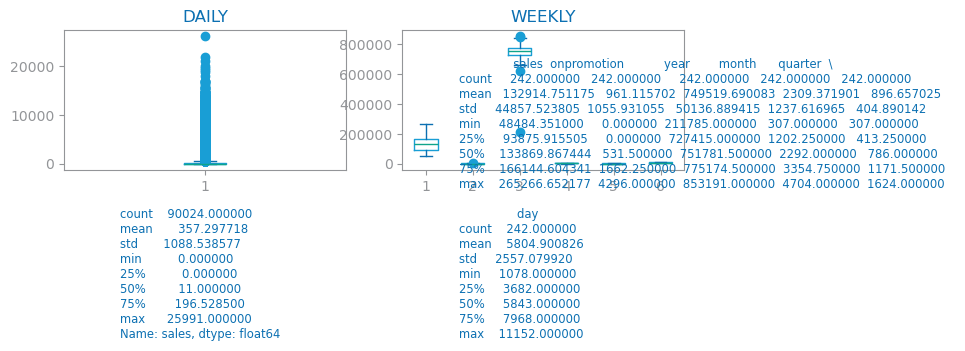

In [134]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
#from dslabs_functions import set_chart_labels

fig: Figure
axs: array
fig, axs = subplots(2, 2, figsize=(2 * HEIGHT, HEIGHT))
set_chart_labels(axs[0, 0], title="DAILY")
axs[0, 0].boxplot(series)
set_chart_labels(axs[0, 1], title="WEEKLY")
axs[0, 1].boxplot(ss_weeks_sum)

axs[1, 0].grid(False)
axs[1, 0].set_axis_off()
axs[1, 0].text(0.2, 0, str(series.describe()), fontsize="small")

axs[1, 1].grid(False)
axs[1, 1].set_axis_off()
axs[1, 1].text(0.2, 0, str(ss_weeks_sum.describe()), fontsize="small")
show()

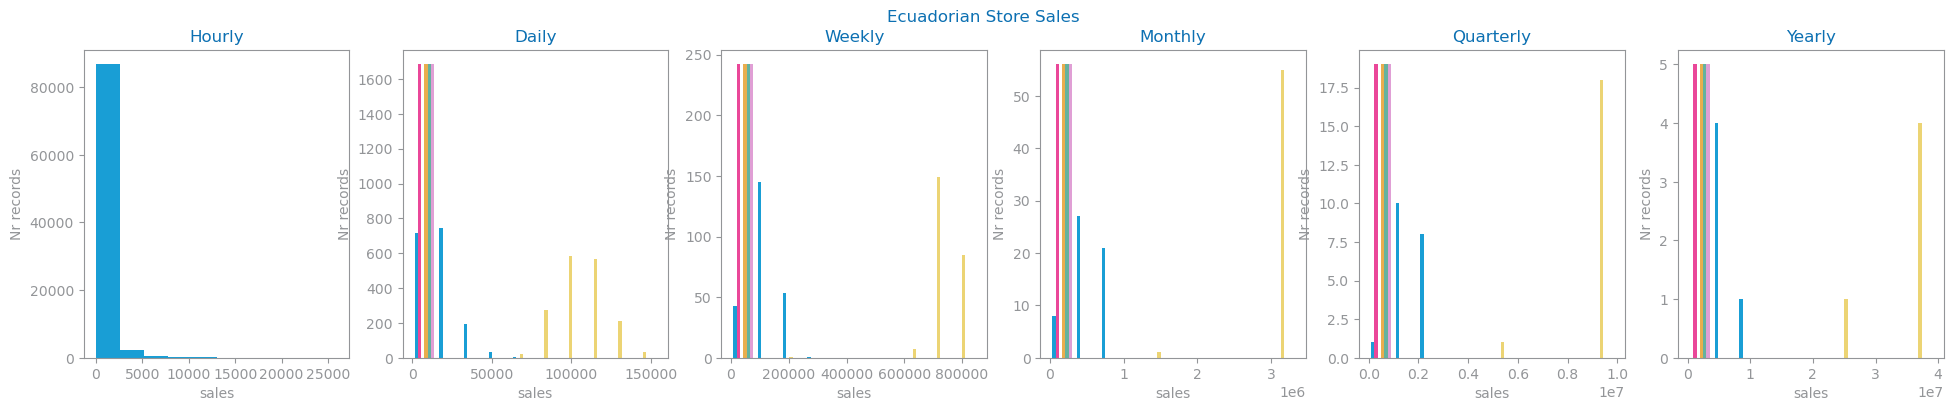

In [135]:
ss_days: Series = ts_aggregation_by(series, gran_level="D", agg_func=sum)
ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func=sum)
ss_quarters: Series = ts_aggregation_by(series, gran_level="Q", agg_func=sum)
ss_yearly: Series = ts_aggregation_by(series, gran_level="Y", agg_func=sum)

grans: list[Series] = [series, ss_days, ss_weeks_sum, ss_months, ss_quarters, ss_yearly]
gran_names: list[str] = ["Hourly", "Daily", "Weekly", "Monthly", "Quarterly", "Yearly"]
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag}")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
show()

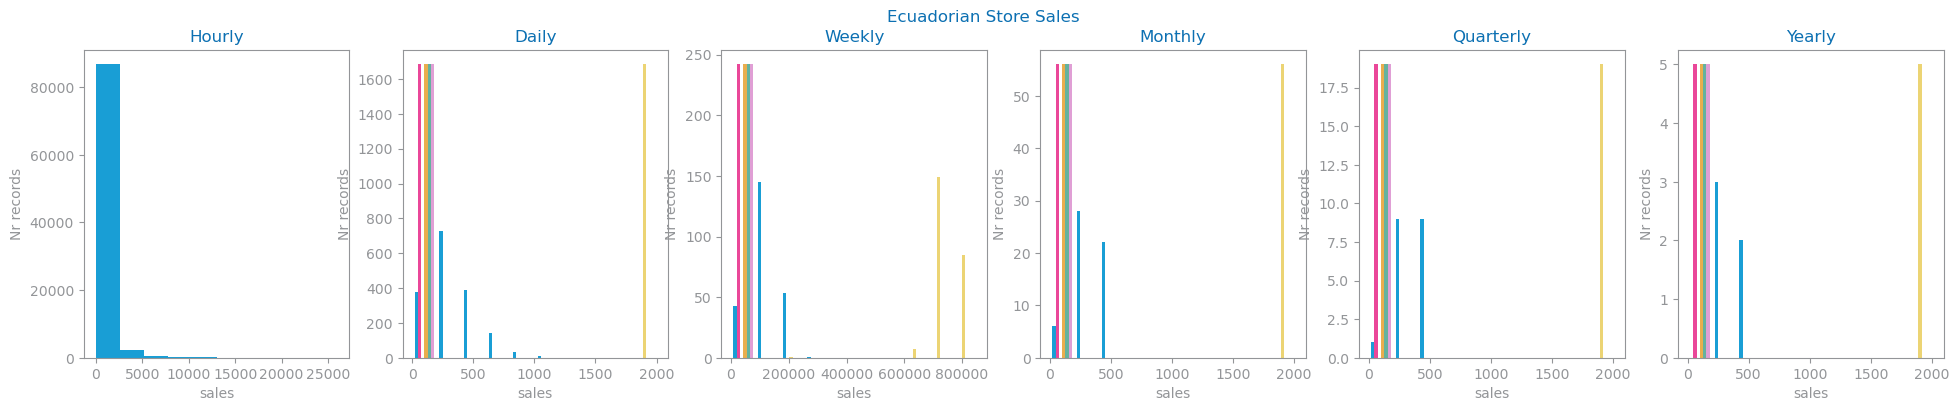

In [136]:
ss_days: Series = ts_aggregation_by(series, gran_level="D", agg_func="mean")
ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func="mean")
ss_quarters: Series = ts_aggregation_by(series, gran_level="Q", agg_func="mean")
ss_yearly: Series = ts_aggregation_by(series, gran_level="Y", agg_func="mean")

grans: list[Series] = [series, ss_days, ss_weeks_sum, ss_months, ss_quarters, ss_yearly]
gran_names: list[str] = ["Hourly", "Daily", "Weekly", "Monthly", "Quarterly", "Yearly"]
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag}")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
show()

# Autocorrelation


## Daily

<Axes: xlabel='date', ylabel='sales'>

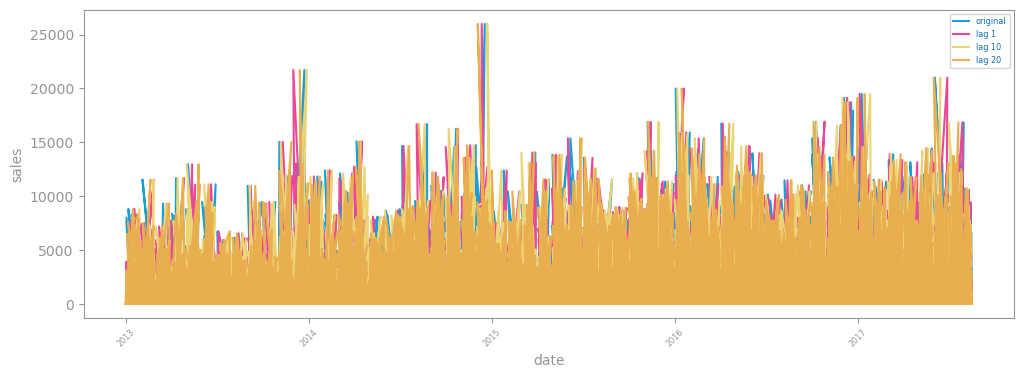

In [137]:
def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    series = series.astype(float).fillna(0)  # Ensure numeric values and fill NaNs
    lagged_series: dict = {"original": series, "lag 1": series.shift(1).fillna(0)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i).fillna(0)  # Avoid NaNs
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel='date', ylabel=target)

## Weekly mean

original: Type = <class 'pandas.core.series.Series'>, Dtype = float64, Sample = date
2012-12-31    240.254453
2013-01-07    245.490748
2013-01-14    185.697240
Freq: W-MON, Name: sales, dtype: float64
lag 1: Type = <class 'pandas.core.series.Series'>, Dtype = float64, Sample = date
2012-12-31      0.000000
2013-01-07    240.254453
2013-01-14    245.490748
Freq: W-MON, Name: sales, dtype: float64
lag 5: Type = <class 'pandas.core.series.Series'>, Dtype = float64, Sample = date
2012-12-31    0.0
2013-01-07    0.0
2013-01-14    0.0
Freq: W-MON, Name: sales, dtype: float64
lag 10: Type = <class 'pandas.core.series.Series'>, Dtype = float64, Sample = date
2012-12-31    0.0
2013-01-07    0.0
2013-01-14    0.0
Freq: W-MON, Name: sales, dtype: float64


<Axes: xlabel='date', ylabel='sales'>

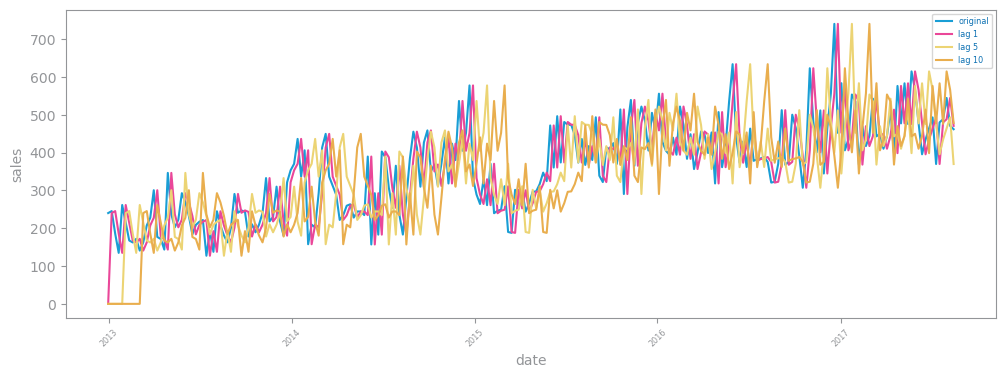

In [138]:
ss_weeks: Series = ts_aggregation_by(series, "W", agg_func="mean")[target]

figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(ss_weeks, 10, 5)

# 🔍 Debugging Output
for key, value in lags.items():
    print(f"{key}: Type = {type(value)}, Dtype = {value.dtype}, Sample = {value.head(3)}")

plot_multiline_chart(ss_weeks.index.to_list(), lags, xlabel="date", ylabel=target)

## Weekly sum

<Axes: xlabel='date', ylabel='sales'>

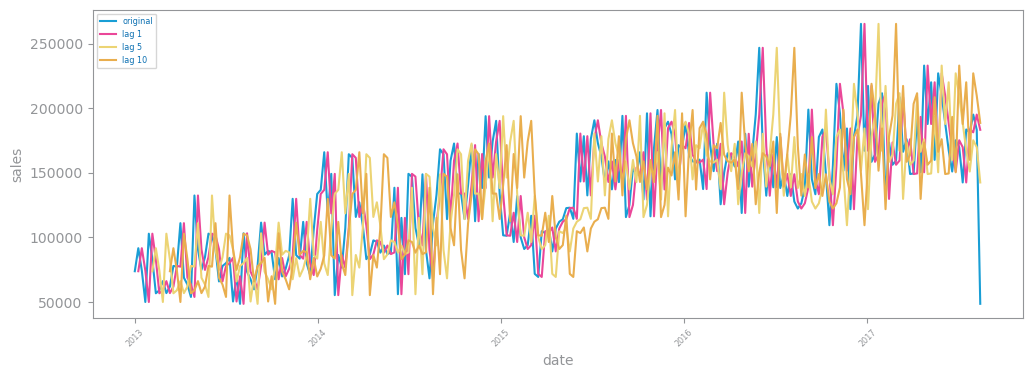

In [139]:
ss_weeks: Series = ts_aggregation_by(series, "W", agg_func="sum")[target]
def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(ss_weeks, 10, 5)
plot_multiline_chart(ss_weeks.index.to_list(), lags, xlabel='date', ylabel=target)

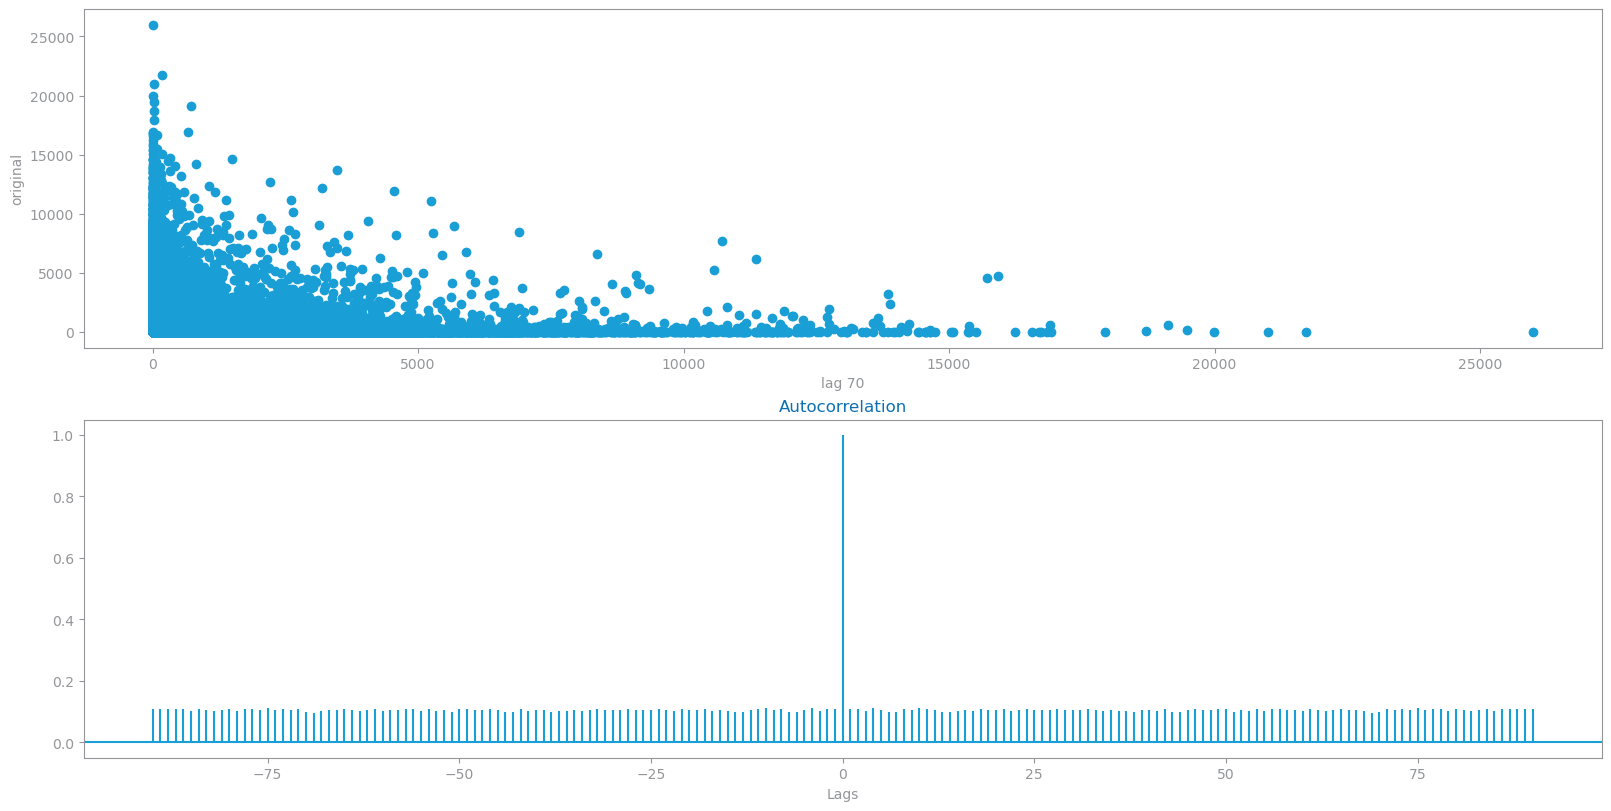

In [140]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec


def autocorrelation_study(series: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


autocorrelation_study(series, 90 , 70) #30 

# Seasonality

In [141]:
from pandas import Series
from matplotlib.pyplot import subplots, show, gca
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose

def plot_components(
    series: Series,
    title: str = "",
    x_label: str = "time",
    y_label: str = "",
) -> list[Axes]:
    decomposition: DecomposeResult = seasonal_decompose(series, model="add")
    components: dict = {
        "observed": series,
        "trend": decomposition.trend,
        "seasonal": decomposition.seasonal,
        "residual": decomposition.resid,
    }
    rows: int = len(components)
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(rows, 1, figsize=(3 * HEIGHT, rows * HEIGHT))
    fig.suptitle(f"{title}")
    i: int = 0
    for key in components:
        set_chart_labels(axs[i], title=key, xlabel=x_label, ylabel=y_label)
        axs[i].plot(components[key])
        i += 1
    return axs

### W mean

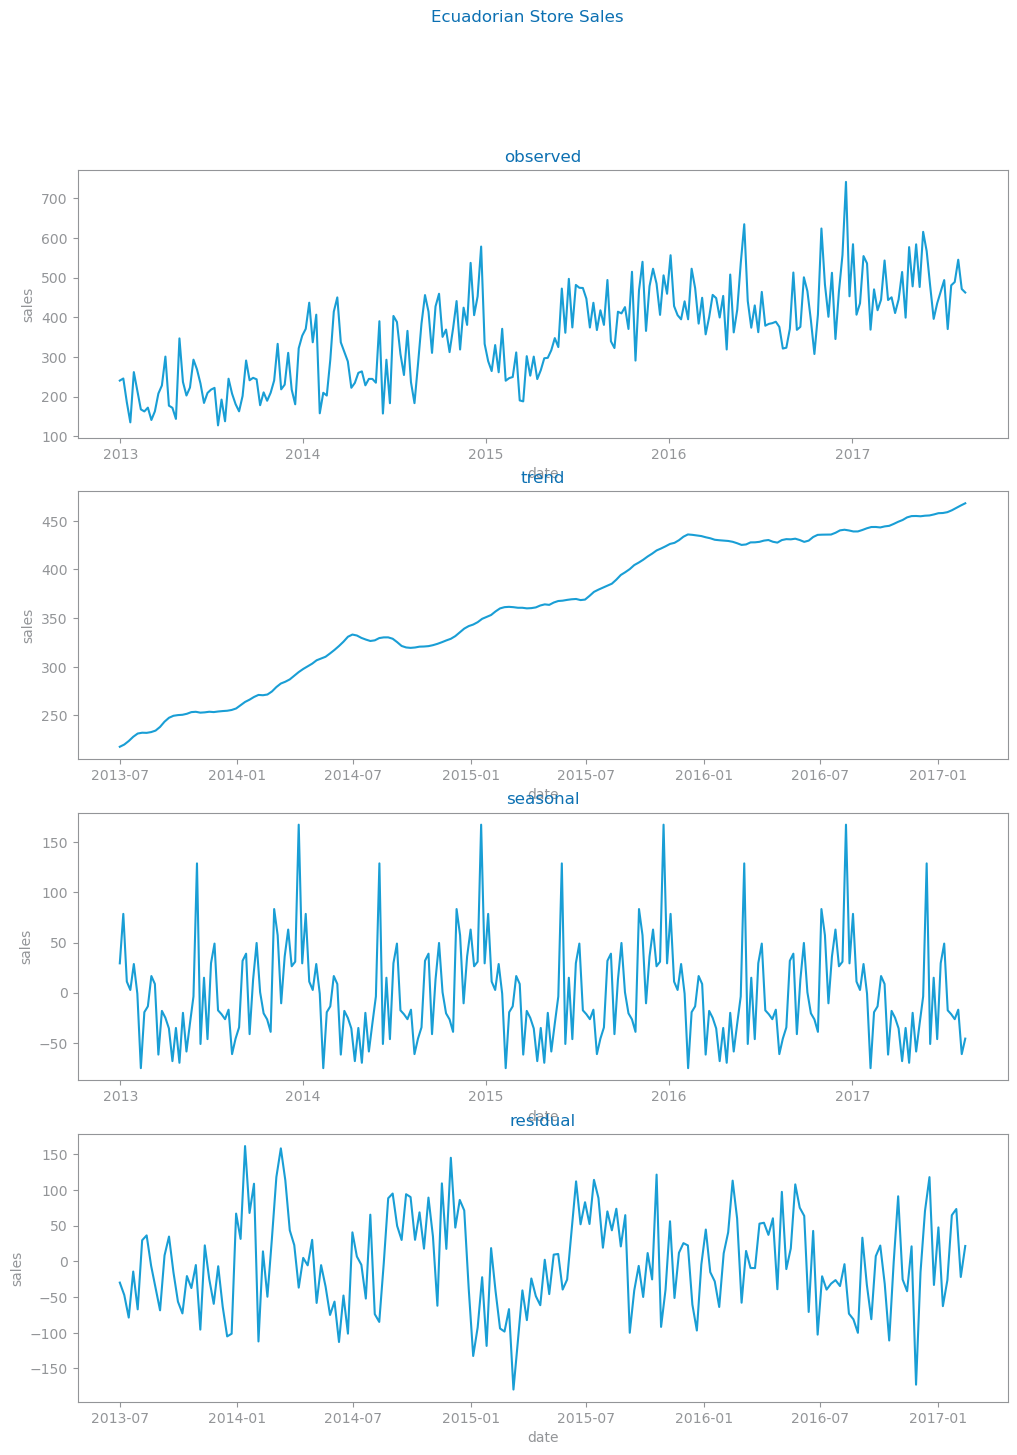

In [142]:
ss_weeks: Series = ts_aggregation_by(series, "W", agg_func="mean")[target]

plot_components(
    ss_weeks,
    title=f"{file_tag}",
    x_label=series.index.name,
    y_label=target,
)
show()

### W sum

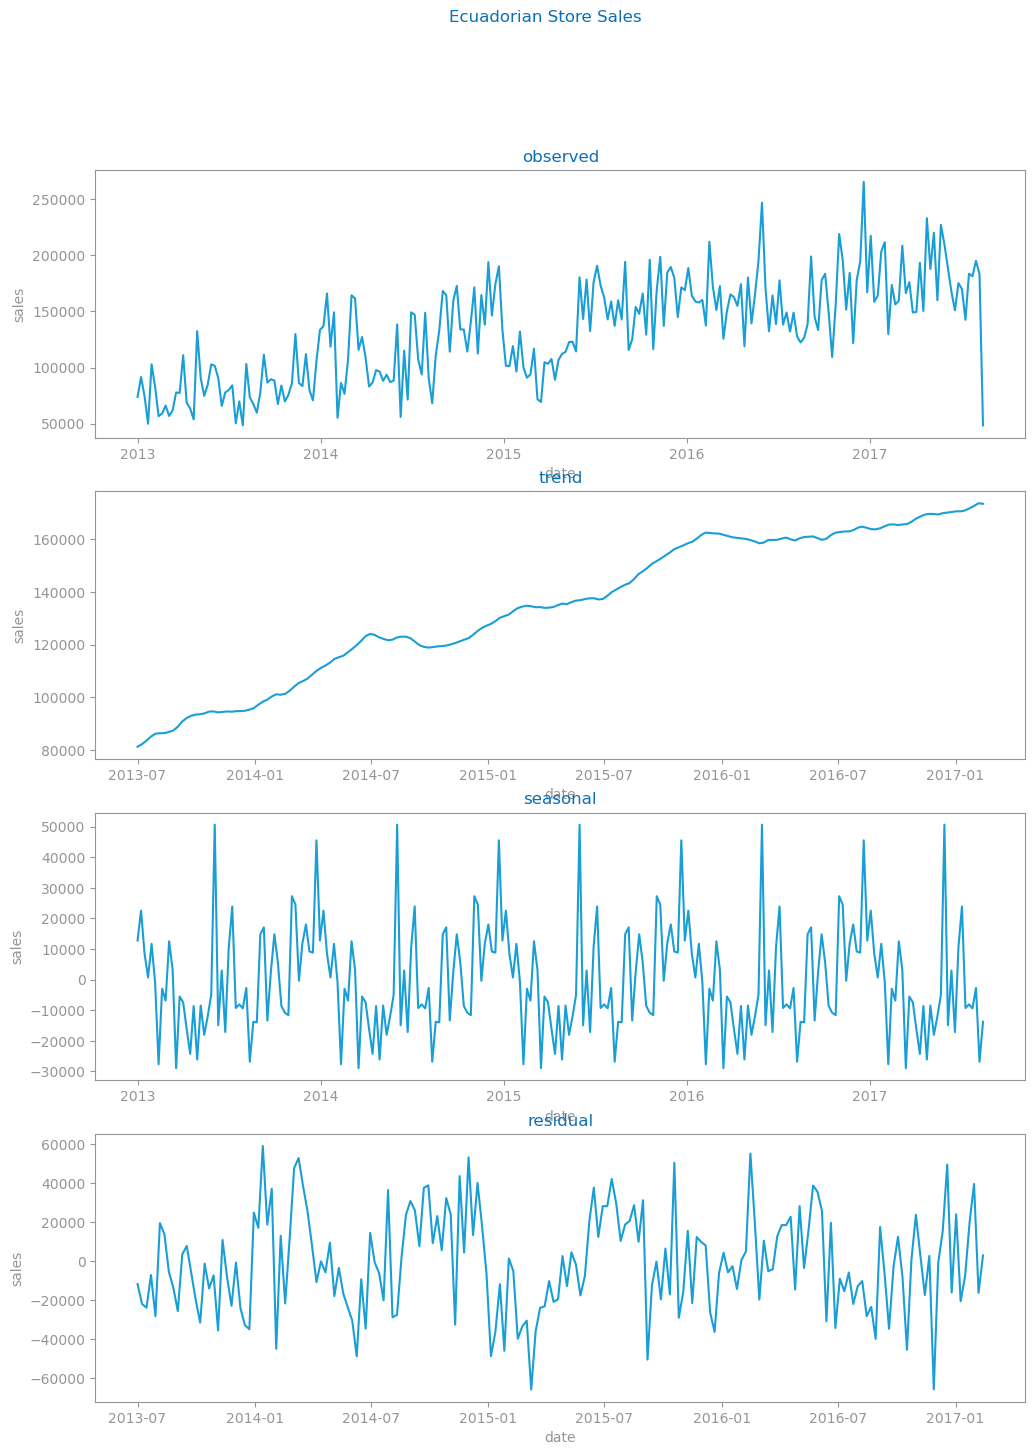

In [143]:
ss_weeks: Series = ts_aggregation_by(series, "W", agg_func="sum")[target]

plot_components(
    ss_weeks,
    title=f"{file_tag}",
    x_label=series.index.name,
    y_label=target,
)
show()

# Stationary 

### W mean

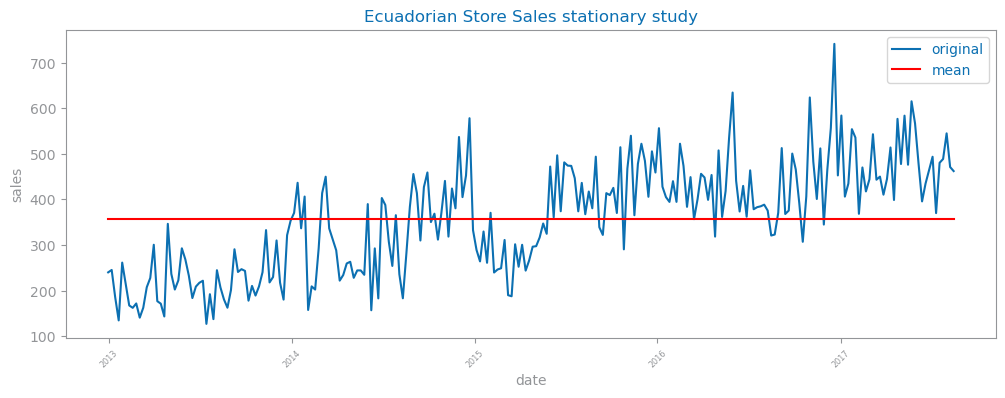

In [144]:
from matplotlib.pyplot import plot, legend
ss_weeks: Series = ts_aggregation_by(series, "W", agg_func="mean")[target]

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
)
n: int = len(ss_weeks)
plot(ss_weeks.index, [ss_weeks.mean()] * n, "r-", label="mean")
legend()
show()

## W sum

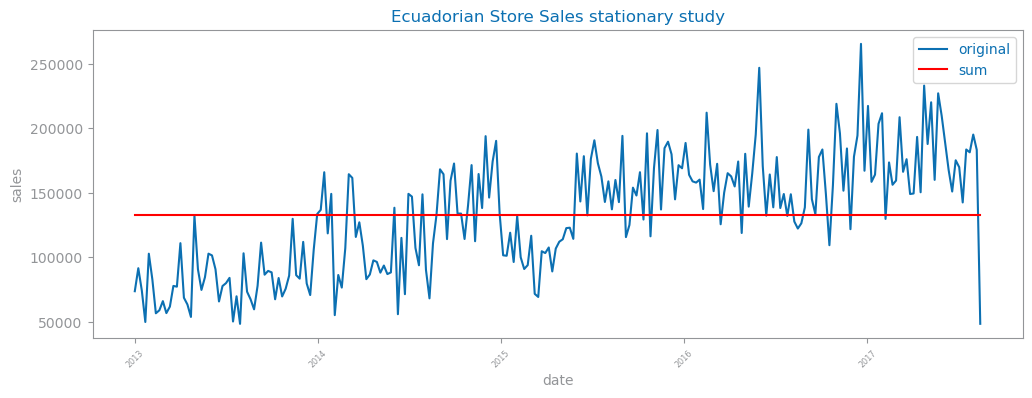

In [145]:
from matplotlib.pyplot import plot, legend
ss_weeks: Series = ts_aggregation_by(series, "W", agg_func="sum")[target]

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
)
n: int = len(ss_weeks)
plot(ss_weeks.index, [ss_weeks.mean()] * n, "r-", label="sum")
legend()
show()

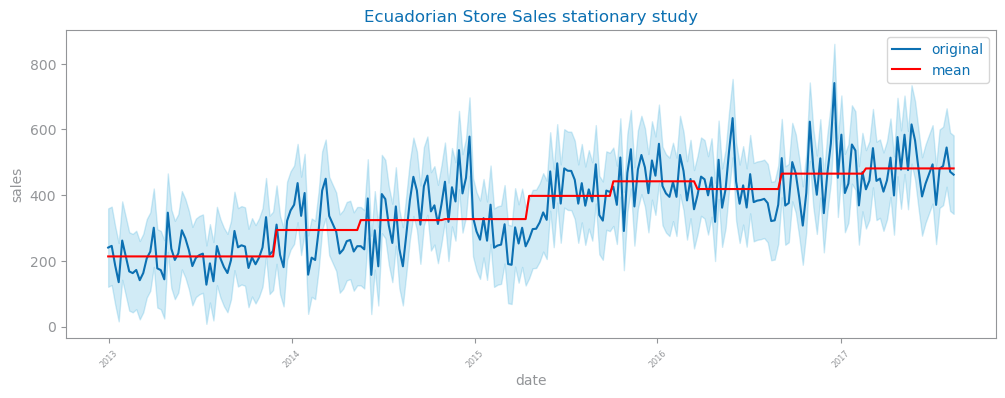

In [146]:
ss_weeks: Series = ts_aggregation_by(series, "W", agg_func="mean")[target]

BINS = 10
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = ss_weeks[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel=ss_weeks.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
    show_stdev=True,
)
n: int = len(ss_weeks)
plot(ss_weeks.index, mean_line, "r-", label="mean")
legend()
show()

But there more precise ways to do it! The Augmented Dickey-Fuller test is a statistical test widely used to verify the stationarity of a series. It determines how strongly a time series is defined by a trend: if this is true, then the series is non-stationary.

In this manner, we have two cases:

p-value <= 0.05 : the series is stationary, meaning its values do not depend on time;
p-value > 0.05 : the series is non-stationary, meaning it shows a time-dependent structure.

In [147]:
from statsmodels.tsa.stattools import adfuller

def eval_stationarity(series: Series) -> bool:
    result = adfuller(ss_weeks)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series {('is' if eval_stationarity(ss_weeks) else 'is not')} stationary")

ADF Statistic: -2.098
p-value: 0.245
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
The series is not stationary


# Save df from preprocessing into a csv file

In [148]:
print(train_df.columns)  # Check the columns of train_df


Index(['sales', 'onpromotion', 'date', 'year', 'month', 'quarter', 'day'], dtype='object')


In [149]:
train_df = train_df.drop(columns=["year", "month", "quarter", "day"])

In [150]:
from pandas import read_csv, DataFrame
import pandas as pd
import os

filepath = 'dataset/train_preproc.csv'
dirpath = os.path.dirname(filepath)

# Ensure directory exists before saving
os.makedirs(dirpath, exist_ok=True)

train_df.to_csv(filepath)
print("File saved successfully!")

train_df.head()

File saved successfully!


,sales,onpromotion,date
date,,,
2013-01-06,0.0,0,2013-01-06
2013-01-21,0.0,0,2013-01-21
2013-01-17,5.0,0,2013-01-17
2013-01-20,6.0,0,2013-01-20
2013-01-05,0.0,0,2013-01-05
